In [3]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
young_adata = sc.read_h5ad('data/satellite_cell_adata/yng_satcell_scamp.h5ad') #adjust for your respective directory
old_adata = sc.read_h5ad('data/doublet_filtered/old_filtered_adata.h5ad') #adjust for your respective directory

In [41]:
all_data = sc.concat([young_adata, old_adata], axis = 0)  # 'integrate' data for comparison analysis

In [42]:
young_adata_obs = list(young_adata.obs_names)
old_adata_obs = list(old_adata.obs_names)

In [43]:
young_id = np.where(all_data.obs_names.isin(young_adata_obs), True, False)
all_data.obs['age'] = np.where(young_id, 'young', 'old')

In [ ]:
sc.pp.log1p(all_data)

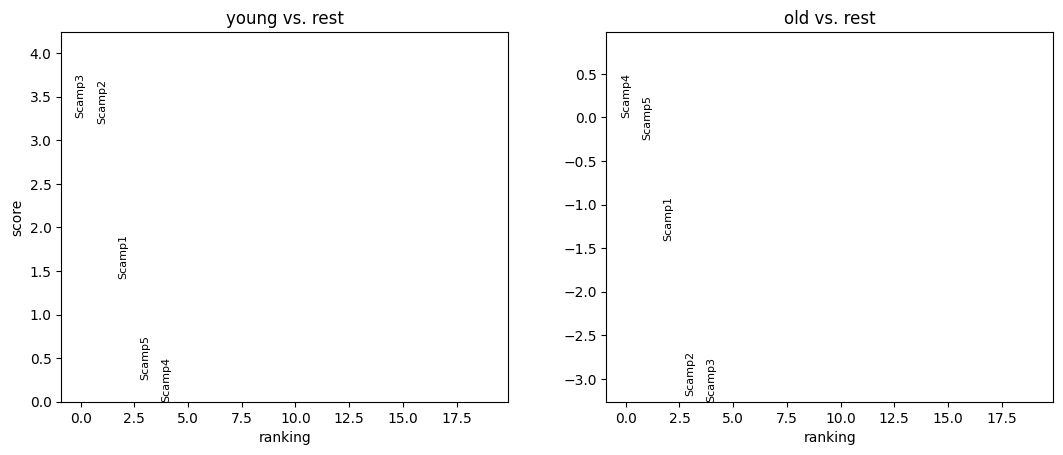

In [58]:
# differential expression algorithm
sc.tl.rank_genes_groups(all_data, 'age', groups = ['young', 'old'], method = 'wilcoxon')
sc.pl.rank_genes_groups(all_data, sharey = False)

In [60]:
de_results = sc.get.rank_genes_groups_df(all_data, None)

In [62]:
de_results

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,young,Scamp3,3.261987,0.567149,0.001106,0.003573
1,young,Scamp2,3.188653,0.587570,0.001429,0.003573
2,young,Scamp1,1.411090,0.566429,0.158218,0.263697
3,young,Scamp5,0.256278,0.563477,0.797736,0.997170
4,young,Scamp4,0.000000,0.000000,1.000000,1.000000
5,old,Scamp4,0.000000,0.000000,1.000000,1.000000
6,old,Scamp5,-0.256278,-0.563477,0.797736,0.997170
7,old,Scamp1,-1.411090,-0.566429,0.158218,0.263697
8,old,Scamp2,-3.188653,-0.587570,0.001429,0.003573
9,old,Scamp3,-3.261987,-0.567149,0.001106,0.003573


In [10]:
young_adata #showcases number of cells in young sample (272 cells)

AnnData object with n_obs × n_vars = 272 × 5
    obs: 'doublet', 'satellite_cell'

In [11]:
old_adata #showcases number of cells in old sample (419 cells)

AnnData object with n_obs × n_vars = 419 × 5
    obs: 'doublet', 'satellite_cell'